In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from dask.distributed import Client
from datetime import timedelta
import datetime
import xarray as xr
import matplotlib.dates as md
import dateutil
from datetime import datetime

sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av

#plt.style.use("ggplot")
#plt.style.use(['science','ieee', 'grid'])
#rc('font',**{'family':'serif','serif':['Computer Modern Roman']})

# Scaling

## CICE6-WIM-10

### 6 processors

```
======================================================================================
                  Resource Usage on 2023-09-25 09:31:28:
   Job Id:             96041439.gadi-pbs
   Project:            ia40
   Exit Status:        0
   Service Units:      19.32
   NCPUs Requested:    6                      NCPUs Used: 6               
                                           CPU Time Used: 00:23:34        
   Memory Requested:   190.0GB               Memory Used: 3.11GB          
   Walltime requested: 24:00:00            Walltime Used: 00:04:04        
   JobFS requested:    100.0MB                JobFS used: 8.05MB          
======================================================================================

### 12 Processors

```
======================================================================================
                  Resource Usage on 2023-09-25 09:36:11:
   Job Id:             96041863.gadi-pbs
   Project:            ia40
   Exit Status:        0
   Service Units:      11.72
   NCPUs Requested:    12                     NCPUs Used: 12              
                                           CPU Time Used: 00:28:27        
   Memory Requested:   190.0GB               Memory Used: 3.61GB          
   Walltime requested: 24:00:00            Walltime Used: 00:02:28        
   JobFS requested:    100.0MB                JobFS used: 8.07MB          
======================================================================================

### 24 Processors

```
======================================================================================
                  Resource Usage on 2023-09-25 09:43:09:
   Job Id:             96042271.gadi-pbs
   Project:            ia40
   Exit Status:        0
   Service Units:      8.00
   NCPUs Requested:    24                     NCPUs Used: 24              
                                           CPU Time Used: 00:38:30        
   Memory Requested:   190.0GB               Memory Used: 4.79GB          
   Walltime requested: 24:00:00            Walltime Used: 00:01:41        
   JobFS requested:    100.0MB                JobFS used: 8.1MB           
======================================================================================

## CICE6-WIM-025

### 24 processors

```
======================================================================================
                  Resource Usage on 2023-09-25 10:53:02:
   Job Id:             96044917.gadi-pbs
   Project:            ia40
   Exit Status:        0
   Service Units:      126.03
   NCPUs Requested:    24                     NCPUs Used: 24              
                                           CPU Time Used: 10:30:24        
   Memory Requested:   190.0GB               Memory Used: 56.47GB         
   Walltime requested: 24:00:00            Walltime Used: 00:26:32        
   JobFS requested:    100.0MB                JobFS used: 8.1MB           
======================================================================================


## 48 processors

```
======================================================================================
                  Resource Usage on 2023-09-25 11:15:04:
   Job Id:             96048401.gadi-pbs
   Project:            ia40
   Exit Status:        0
   Service Units:      70.88
   NCPUs Requested:    48                     NCPUs Used: 48              
                                           CPU Time Used: 11:40:43        
   Memory Requested:   190.0GB               Memory Used: 79.79GB         
   Walltime requested: 24:00:00            Walltime Used: 00:14:46        
   JobFS requested:    100.0MB                JobFS used: 8.16MB          
======================================================================================

## 96 processors

```
======================================================================================
                  Resource Usage on 2023-09-25 11:43:56:
   Job Id:             96050452.gadi-pbs
   Project:            ia40
   Exit Status:        0
   Service Units:      78.40
   NCPUs Requested:    96                     NCPUs Used: 96              
                                           CPU Time Used: 12:38:34        
   Memory Requested:   190.0GB               Memory Used: 127.02GB        
   Walltime requested: 24:00:00            Walltime Used: 00:08:10        
   JobFS requested:    200.0MB                JobFS used: 8.16MB          
======================================================================================


## CICE6-025

### 24 processors

```
======================================================================================
                  Resource Usage on 2023-09-25 12:34:24:
   Job Id:             96055648.gadi-pbs
   Project:            ia40
   Exit Status:        0
   Service Units:      16.55
   NCPUs Requested:    24                     NCPUs Used: 24              
                                           CPU Time Used: 01:20:50        
   Memory Requested:   190.0GB               Memory Used: 55.84GB         
   Walltime requested: 24:00:00            Walltime Used: 00:03:29        
   JobFS requested:    100.0MB                JobFS used: 8.1MB           
======================================================================================

### 48 processors

```
======================================================================================
                  Resource Usage on 2023-09-25 12:28:34:
   Job Id:             96054978.gadi-pbs
   Project:            ia40
   Exit Status:        0
   Service Units:      11.20
   NCPUs Requested:    48                     NCPUs Used: 48              
                                           CPU Time Used: 01:47:13        
   Memory Requested:   190.0GB               Memory Used: 79.54GB         
   Walltime requested: 24:00:00            Walltime Used: 00:02:20        
   JobFS requested:    100.0MB                JobFS used: 8.16MB          
======================================================================================

### 96 processors

```
======================================================================================
                  Resource Usage on 2023-09-25 12:13:25:
   Job Id:             96052720.gadi-pbs
   Project:            ia40
   Exit Status:        0
   Service Units:      17.76
   NCPUs Requested:    96                     NCPUs Used: 96              
                                           CPU Time Used: 02:35:45        
   Memory Requested:   190.0GB               Memory Used: 126.77GB        
   Walltime requested: 24:00:00            Walltime Used: 00:01:51        
   JobFS requested:    200.0MB                JobFS used: 8.16MB          
======================================================================================


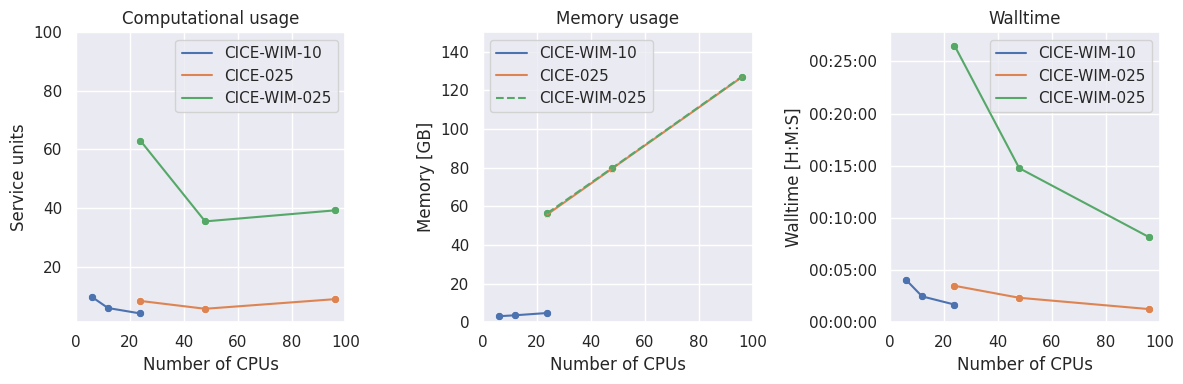

In [4]:
# Daily computational requirements
sns.set_theme()
# 1-degree with waves
cice_wim_10_nprocs = [6, 12, 24] # ncpus
cice_wim_10_SU = [19.32/2, 11.72/2, 8.00/2] # SU, divide by 2 as express queue was used
cice_wim_10_memory = [3.11, 3.61, 4.79] # GB
cice_wim_10_walltime = [datetime(2023, 9, 25, 0, 4, 4), datetime(2023, 9, 25, 0, 2, 28), datetime(2023, 9, 25, 0, 1, 41)]

# 1/4-degree with waves
cice_wim_025_nprocs = [24, 48, 96] # ncpus
cice_wim_025_SU = [126.03/2, 70.88/2, 78.40/2] # SU, divide by 2 as express queue was used
cice_wim_025_memory = [56.47, 79.79, 127.02] # GB
cice_wim_025_walltime = [datetime(2023, 9, 25, 0, 26, 32), datetime(2023, 9, 25, 0, 14, 46), datetime(2023, 9, 25, 0, 8, 10)]

# 1/4-degree WITHOUT waves
cice_025_nprocs = [24, 48, 96] # ncpus
cice_025_SU = [16.55/2, 11.20/2, 17.76/2] # SU, divide by 2 as express queue was used
cice_025_memory = [55.84, 79.54, 126.77] # GB
cice_025_walltime = [datetime(2023, 9, 25, 0, 3, 29), datetime(2023, 9, 25, 0, 2, 20), datetime(2023, 9, 25, 0, 1, 15)]



fig = plt.figure(figsize=[12, 4])
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.lineplot(ax = ax1, x = cice_wim_10_nprocs, y = cice_wim_10_SU, label = 'CICE-WIM-10', linestyle = '-')
sns.scatterplot(ax = ax1, x = cice_wim_10_nprocs, y = cice_wim_10_SU)
sns.lineplot(ax = ax1, x = cice_025_nprocs, y = cice_025_SU, label = 'CICE-025', linestyle = '-')
sns.scatterplot(ax = ax1, x = cice_025_nprocs, y = cice_025_SU)
sns.lineplot(ax = ax1, x = cice_wim_025_nprocs, y = cice_wim_025_SU, label = 'CICE-WIM-025', linestyle = '-')
sns.scatterplot(ax = ax1, x = cice_wim_025_nprocs, y = cice_wim_025_SU)
ax1.set(title='Computational usage', 
       #xscale="log", 
       #yscale="log",
       xlim = (0, 100),
       ylim = (1, 100),
       xlabel = 'Number of CPUs',
       ylabel = 'Service units',
  )

# Memory
sns.lineplot(ax = ax2, x = cice_wim_10_nprocs, y = cice_wim_10_memory, label = 'CICE-WIM-10', linestyle = '-')
sns.scatterplot(ax = ax2, x = cice_wim_10_nprocs, y = cice_wim_10_memory)
sns.lineplot(ax = ax2, x = cice_025_nprocs, y = cice_025_memory, label = 'CICE-025', linestyle = '-')
sns.scatterplot(ax = ax2, x = cice_025_nprocs, y = cice_025_memory)
sns.lineplot(ax = ax2, x = cice_wim_025_nprocs, y = cice_wim_025_memory, label = 'CICE-WIM-025', linestyle = '--')
sns.scatterplot(ax = ax2, x = cice_wim_025_nprocs, y = cice_wim_025_memory)
ax2.set(title='Memory usage', 
       xlim = (0, 100),
       ylim = (0, 150),
       xlabel = 'Number of CPUs',
       ylabel = 'Memory [GB]',
  )

# Walltime
sns.lineplot(ax = ax3, x = cice_wim_10_nprocs, y = cice_wim_10_walltime, label = 'CICE-WIM-10', linestyle = '-')
sns.scatterplot(ax = ax3, x = cice_wim_10_nprocs, y = cice_wim_10_walltime)
sns.lineplot(ax = ax3, x = cice_025_nprocs, y = cice_025_walltime, label = 'CICE-WIM-025', linestyle = '-')
sns.scatterplot(ax = ax3, x = cice_025_nprocs, y = cice_025_walltime)
sns.lineplot(ax = ax3, x = cice_wim_025_nprocs, y = cice_wim_025_walltime, label = 'CICE-WIM-025', linestyle = '-')
sns.scatterplot(ax = ax3, x = cice_wim_025_nprocs, y = cice_wim_025_walltime)
ax3.set(title='Walltime', 
       xlim = (0, 100),
       #ylim = (0, 150),
       xlabel = 'Number of CPUs',
       ylabel = 'Walltime [H:M:S]',
  )
xfmt = md.DateFormatter('%H:%M:%S')
ax3.yaxis.set_major_formatter(xfmt)

fig.tight_layout()

plot_dir = '/home/566/nd0349/notebooks/figures'
plt.savefig(plot_dir + '/' + 'NCMAS2024.png', dpi=1000, transparent=False)
plt.show()

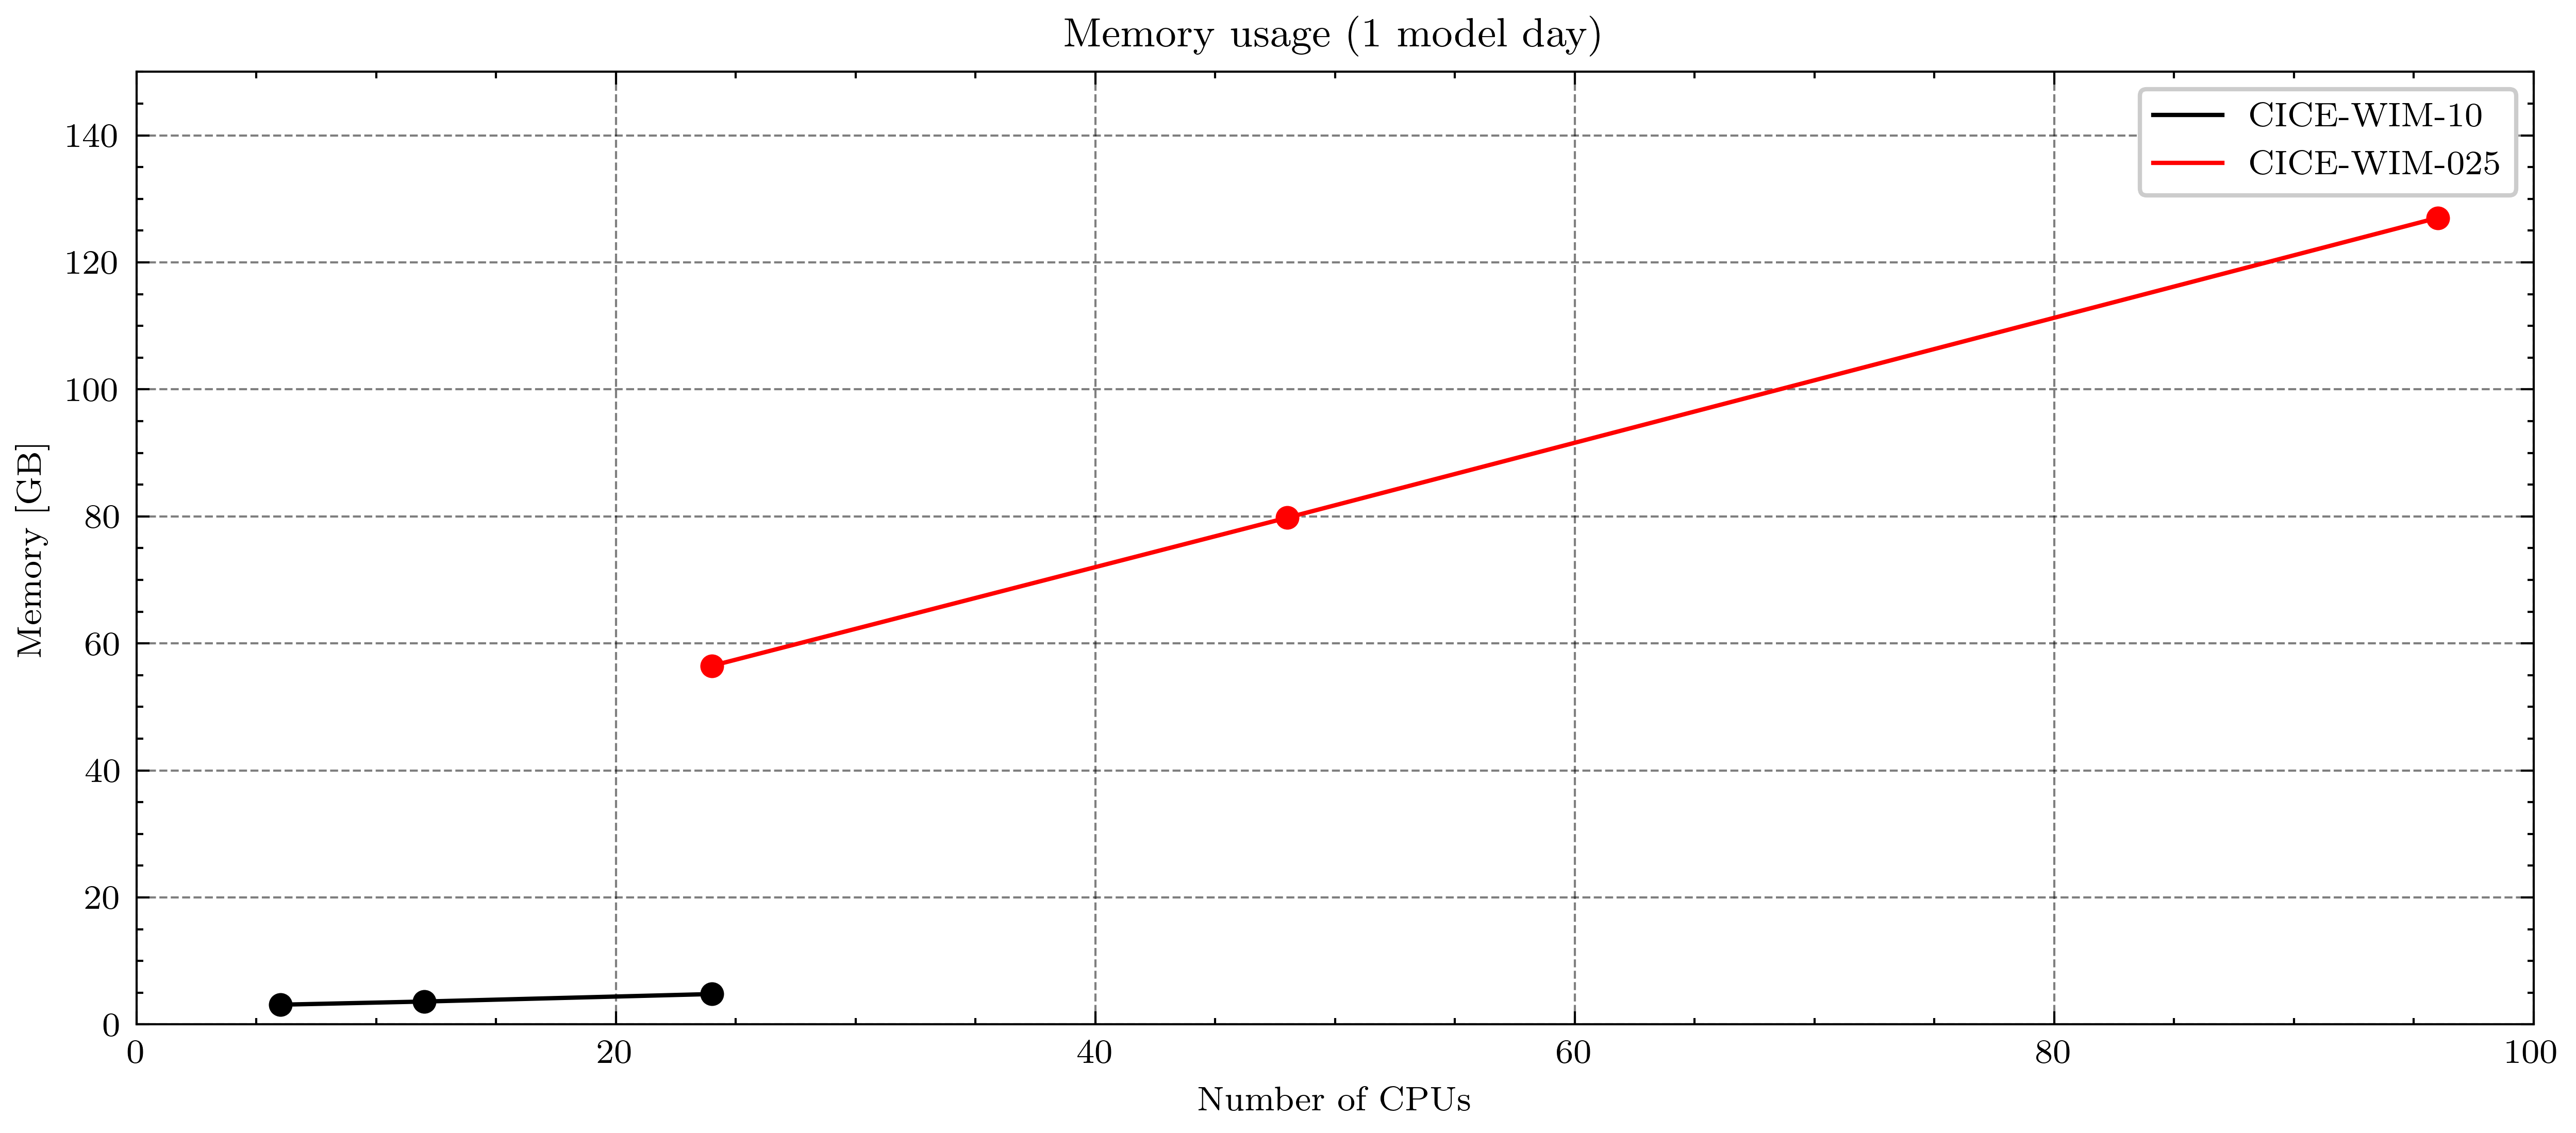

In [5]:
fig = plt.figure(figsize=[10, 4])
ax = fig.add_subplot(1, 1, 1)
sns.lineplot(ax = ax, x = cice_wim_10_nprocs, y = cice_wim_10_memory, label = 'CICE-WIM-10', linestyle = '-')
sns.scatterplot(ax = ax, x = cice_wim_10_nprocs, y = cice_wim_10_memory)
sns.lineplot(ax = ax, x = cice_wim_025_nprocs, y = cice_wim_025_memory, label = 'CICE-WIM-025', linestyle = '-')
sns.scatterplot(ax = ax, x = cice_wim_025_nprocs, y = cice_wim_025_memory)
ax.set(title='Memory usage (1 model day)', 
       xlim = (0, 100),
       ylim = (0, 150),
       xlabel = 'Number of CPUs',
       ylabel = 'Memory [GB]',
  )
plot_dir = '/home/566/nd0349/notebooks/figures'
plt.savefig(plot_dir + '/' + 'MEM_WIM10.png', dpi=1000, transparent=False)
plt.show()